# Demo of script to plot nt imbalance for sequence span

In order to demonstrate the use of my script `extract_subsequence_from_FASTA.py`, found [here](https://github.com/fomightez/sequencework/tree/master/plot_nt_imbalance),  I'll use it to plot nucleotide difference imbalance for the span of coordinates from the *Saccharomyces cerevisiae* S288C reference sequence that is similar to [Figure 8, panel B](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4882425/figure/F8/) of [Morrill et al 2016(PMID: 27026700)](https://www.ncbi.nlm.nih.gov/pubmed/27026700).  
This will also demonstrate in the 'Preparation' section use of my script `get_chromosomal_coordinates_as_FASTA.py`, found [here](https://github.com/fomightez/yeastmine), to use YeastMine to retrieve a sequence for a specified region of a *S. cerevisiae* chromosome.

Full reference for the plot style/approach:

[DNA Instability Maintains the Repeat Length of the Yeast RNA Polymerase II C-terminal Domain. Morrill SA, Exner AE, Babokhov M, Reinfeld BI, Fuchs SM. J Biol Chem. 2016 May 27;291(22):11540-50. doi: 10.1074/jbc.M115.696252. Epub 2016 Mar 29.(PMID: 27026700)](https://www.ncbi.nlm.nih.gov/pubmed/27026700)

References for sequence data and YeastMine/Intermine interface used in demonstration:  

[The reference genome sequence of Saccharomyces cerevisiae: then and now. Engel SR, Dietrich FS, Fisk DG, Binkley G, Balakrishnan R, Costanzo MC, Dwight SS, Hitz BC, Karra K, Nash RS, Weng S, Wong ED, Lloyd P, Skrzypek MS, Miyasato SR, Simison M, Cherry JM. G3 (Bethesda). 2014 Mar 20;4(3):389-98. doi: 10.1534/g3.113.008995.(PMID: 24374639)](https://www.ncbi.nlm.nih.gov/pubmed/24374639)

[Saccharomyces Genome Database: the genomics resource of budding yeast. Cherry JM, Hong EL, Amundsen C, Balakrishnan R, Binkley G, Chan ET, Christie KR, Costanzo MC, Dwight SS, Engel SR, Fisk DG, Hirschman JE, Hitz BC, Karra K, Krieger CJ, Miyasato SR, Nash RS, Park J, Skrzypek MS, Simison M, Weng S, Wong ED. Nucleic Acids Res. 2012 Jan;40(Database issue):D700-5. doi: 10.1093/nar/gkr1029. Epub 2011 Nov 21. (PMID: 22110037)](https://www.ncbi.nlm.nih.gov/pubmed/22110037)

[YeastMine--an integrated data warehouse for Saccharomyces cerevisiae data as a multipurpose tool-kit. Balakrishnan R, Park J, Karra K, Hitz BC, Binkley G, Hong EL, Sullivan J, Micklem G, Cherry JM. Database (Oxford). 2012 Mar 20;2012:bar062. doi: 10.1093/database/bar062. Print 2012.(PMID: 22434830)](https://www.ncbi.nlm.nih.gov/pubmed/22434830)

[InterMine: extensive web services for modern biology. Kalderimis A, Lyne R, Butano D, Contrino S, Lyne M, Heimbach J, Hu F, Smith R, Stěpán R, Sullivan J, Micklem G. Nucleic Acids Res. 2014 Jul;42(Web Server issue):W468-72. doi: 10.1093/nar/gku301. Epub 2014 Apr 21.(PMID: 24753429)](https://www.ncbi.nlm.nih.gov/pubmed/24753429)



------

<div class="alert alert-block alert-warning">
<p>If you haven't used one of these notebooks before, they're basically web pages in which you can write, edit, and run live code. They're meant to encourage experimentation, so don't feel nervous. Just try running a few cells and see what happens!.</p>

<p>
    Some tips:
    <ul>
        <li>Code cells have boxes around them. When you hover over them a <i class="fa-step-forward fa"></i> icon appears.</li>
        <li>To run a code cell either click the <i class="fa-step-forward fa"></i> icon, or click on the cell and then hit <b>Shift+Enter</b>. The <b>Shift+Enter</b> combo will also move you to the next cell, so it's a quick way to work through the notebook.</li>
        <li>While a cell is running a <b>*</b> appears in the square brackets next to the cell. Once the cell has finished running the asterisk will be replaced with a number.</li>
        <li>In most cases you'll want to start from the top of notebook and work your way down running each cell in turn. Later cells might depend on the results of earlier ones.</li>
        <li>To edit a code cell, just click on it and type stuff. Remember to run the cell once you've finished editing.</li>
    </ul>
</p>
</div>

---

## Preparation

The script needs a sequence file in FASTA format to take as input to scan and then plot the related traits across the sequence. Here we will retrieve a sequence of a span of the yeast chromosomes IV and use that as the input for the script demonstration below.  
To do that we'll use my script `get_chromosomal_coordinates_as_FASTA.py`, found [here](https://github.com/fomightez/yeastmine), to use YeastMine to retrieve a sequence for a specified region of a *S. cerevisiae* chromosome.

In [9]:
# Get the script
!curl -OL https://raw.githubusercontent.com/fomightez/yeastmine/master/get_chromosomal_coordinates_as_FASTA.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16021  100 16021    0     0  89005      0 --:--:-- --:--:-- --:--:-- 89005


Get a sequence to work with.

In [10]:
%run get_chromosomal_coordinates_as_FASTA.py IV 200000-220000

Sequence on Watson strand specified...retrieving sequence from chromosome IV...making FASTA formatted entry with retrieved sequence...

File of genomic sequence saved as 'S288C_chrIV_200000-220000_genomic.fsa'.
Finished.


Now we have a sequence to use to plot.

There is also a dependency for the plotting script that isn't currently installed by default in this environment. (Whether that is already installed could change at a later point and then there is still no harm running this still, and it will just say something to the effect that it already satisfied.)

In [2]:
#install a necessary dependency
!pip install pyfaidx

  Stored in directory: /home/jovyan/.cache/pip/wheels/54/a2/b4/e242e58d23b2808e191b214067880faa46cd2341f363886e0b
Successfully built pyfaidx


##  Basic use of the plotting script

This script gets a sequence from a sequence file in FASTA format. It can be either a single sequence or more. You provide an indentifier to specify which sequence in the multiFASTA file to mine. In fact you always need to provide something for the indentifier parameter when calling this script or the main function of it, but that text can be nonseniscal if there is only one sequence in the sequence file. It disregards anything provided if there is only one.  
The only other thing necessary is providing start and end positions to specify the subsequence. Positions are to be specified in typical position terms where the first residue is numbered one.

In [5]:
# Get the script
!curl -O https://raw.githubusercontent.com/fomightez/sequencework/master/plot_nt_imbalance/nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18851  100 18851    0     0  83044      0 --:--:-- --:--:-- --:--:-- 82679


#### Display USAGE block

In [6]:
!python nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py -h

usage:     nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py
       [-h] [-svg] SEQUENCE_FILE CHR START_POS

nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2
016.py makes a plot figure like Figure 8, panel B of Morrill et al 2016 (PMID:
27026700), see
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4882425/figure/F8/. **** Script
by Wayne Decatur (fomightez @ github) ***

positional arguments:
  SEQUENCE_FILE    Name of sequence file to use as input. Must be FASTA
                   format. Can be a multi-FASTA file, i.e., multiple sequences
                   in FASTA format in one file.
  CHR              Designation of chromosome / contig/ scaffold / region
                   corresponding to that in sequence file. To be used for plot
                   label. No spaces. Feel free to prefix with a species
                   indicator as well .
  START_POS        Coordinate position that corresponds to first position of
  

Next, we'll use that to plot the sequence data we obtained during 'Preparation'.

#### Plotting example (illustrating command line-based usage)

This will run it as if it was on the command line. (Note if this was indeed on the command line, the command would be the same with the exception of `!` at the start. The exclamation point is a Jupyter/IPython specific signal to run the command following it as if it was on the command line.)

In addition to calling the script, we provide it the name of the sequence file to use and a couple of items to use in labels. The items provided cannot have spaces, and you'll note that those are actually present in the sequence name that happened to be made. However, the script itself doesn't harvest that information so that the script is more general.

In [38]:
!python nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py S288C_chrIV_200000-220000_genomic.fsa chrIV 200000


Plot image saved to: S288C_chrIV_200000-220000_genomic_nt_imblance_plot.png


Because we are in a Jupyter environment we can use code to view that generated image here.

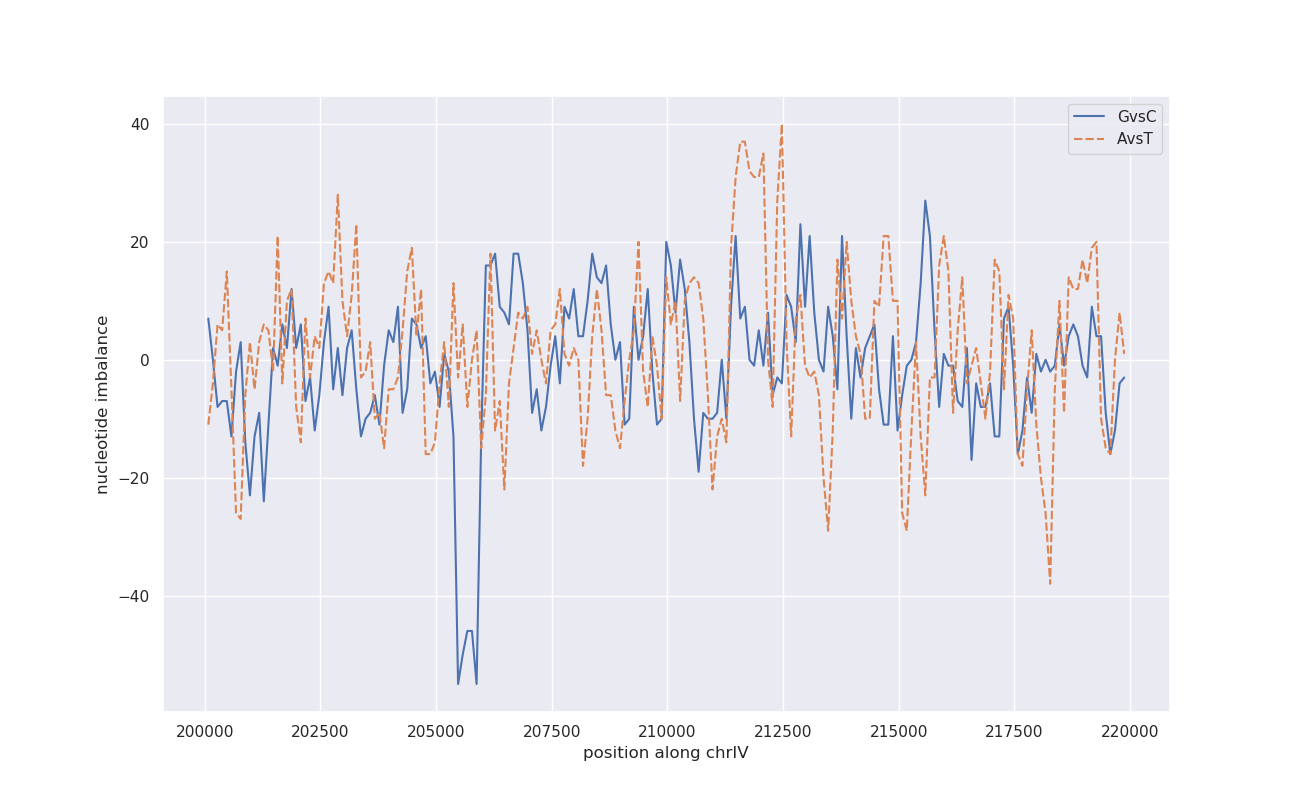

In [13]:
from IPython.display import Image
Image("S288C_chrIV_200000-220000_genomic_nt_imblance_plot.png")

That process above was meant to better mirror how you'd run it on the command line. If actually were using this script in a Jupyter notebook, you could simply run the command in the next cell with the Jupyter magics `%run` command and the resulting image will get shown in the notebook without need for additional code like in the last cell.  
Like so:


Plot image saved to: S288C_chrIV_200000-220000_genomic_nt_imblance_plot.png


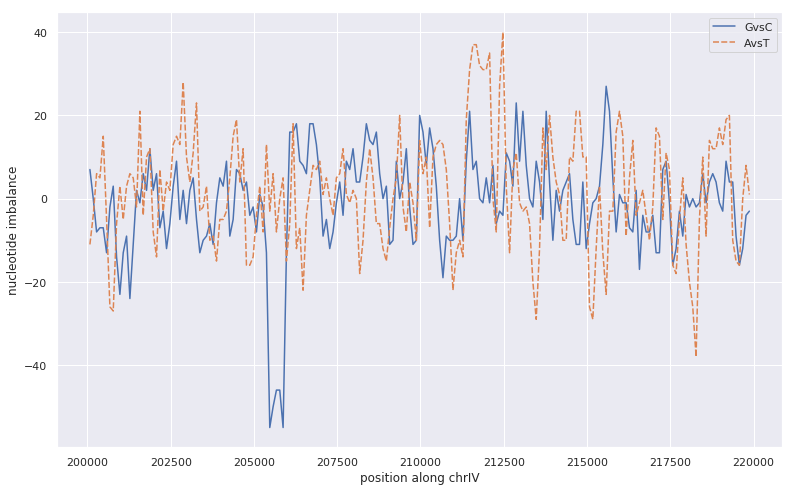

In [39]:
%run nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py S288C_chrIV_200000-220000_genomic.fsa chrIV 200000

#### Automating argument formation but still ultimately using the command line-style call to the script

Because we are in a Jupyter environment, we could have used code to extract the details used in the last two arguments of the command call, specifically `chrIV` and `200000`, from the file name. I'll illustrate that for this example because it could be handy if processing multiple regions. 

In [40]:
#Use fnmatch to make a list of files ending in `.fsa` and the work through them splicing out useful bits to make plot command
import os
import sys
import fnmatch
name_part_to_match = ".fsa"
associated_fns= []
for file in os.listdir('.'):
    if fnmatch.fnmatch(file, '*'+name_part_to_match):
        associated_fns.append(file)
sys.stderr.write("Files ending in `{}` identified.\nReading and plotting each...".format(name_part_to_match))
# Interate over list to process name and fire off commands
for fn in associated_fns:
    chr_name = fn.split("_")[1]
    start_num = fn.split("_")[2].rsplit("-")[0]
    !python nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py {fn} {chr_name} {start_num}
    sys.stderr.write(f"Processed assembled command:\n 'python nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py {fn} {chr_name} {start_num}' ")
sys.stderr.write("\nEnd of list of files ending in `{}`reached.\nDone.".format(name_part_to_match))




Files ending in `.fsa` identified.
Reading and plotting each...


Plot image saved to: S288C_chrIV_200000-220000_genomic_nt_imblance_plot.png


Processed assembled command:
 'python nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py S288C_chrIV_200000-220000_genomic.fsa chrIV 200000' 
End of list of files ending in `.fsa`reached.
Done.

Although you may wish to further simplify things by importing the main function of this script and provide the details as Python objects that way. This is illustrated at the end of the next section about importing the main function.

The only option other not already illustrated is adding `--save_vg` (or the abbreviated form `-svg`) to the commands to produce vector graphics which can produce large files that are very useful for further modification by Inkscape or Adobe Illustrator.

## Use script in a Jupyter notebook 

This will demonstrate importing the main function into a notebook.


In [32]:
# Get the script if the above section wasn't run. Does nothing if it was.
import os
file_needed = "nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py"
if not os.path.isfile(file_needed):
    !curl -O https://raw.githubusercontent.com/fomightez/sequencework/master/plot_nt_imbalance/nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py

Let's make it so the equivalent to the example command worked out above and shown again on the line below runs and the plot is returned directly into the notebook environment as a figure object to display in this notebook. 

```text
python nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py S288C_chrIV_200000-220000_genomic.fsa chrIV 200000
```

At the end of this section we'll show how the returned notebook can be further modified via the notebook interface when doing this. 


First we need to import the main function from the script file.

In [33]:
from nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016 import nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016

Now to try using that to do what was initially done with the sequence data above. The main difference besides the arrangement of the items is that we should specify `return_fig=True`. 

Plot figure object returned.

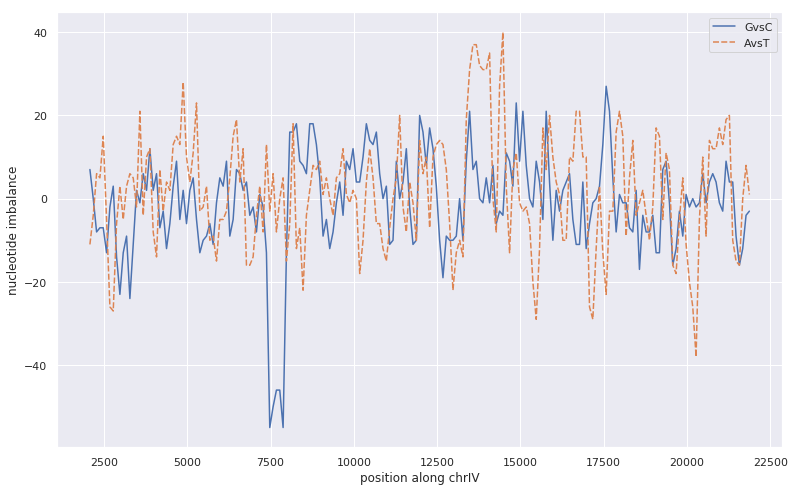

In [34]:
out = nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016("S288C_chrIV_200000-220000_genomic.fsa", "chrIV", 2000, return_fig=True)

Note that if we simply had left off `return_fig=True`, it would have been a perfectly valid statement. It would have been interpreted as set to `False` and an image file would be produced just like when calling from the command line.

However, returning the figure as a Python object affords us the opportunity to further modify it within the Jupyter environment, even after the function generated it via the code in the `python nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016.py` script. This will be demonstrate below at the end of this section; however before getting to that novel use of the main function and the Jupyter environment, let's revisit the example above where we scripted capaturing of the elements needed in the call to the script from the input file name. If we stay within all Python it becomes slightly easier to do because we don't need to use the brackets to feed python variables into the shell commands.

#### Automating argument formation entirely via Python

The next cell recapitulates the approach illustrate at the end of the basic usage on the command line section for how'd you do that in the notebook after importing the main function.

Files ending in `.fsa` identified.
Reading and plotting each...Plot figure object returned.
End of list of files ending in `.fsa`reached.
Done.

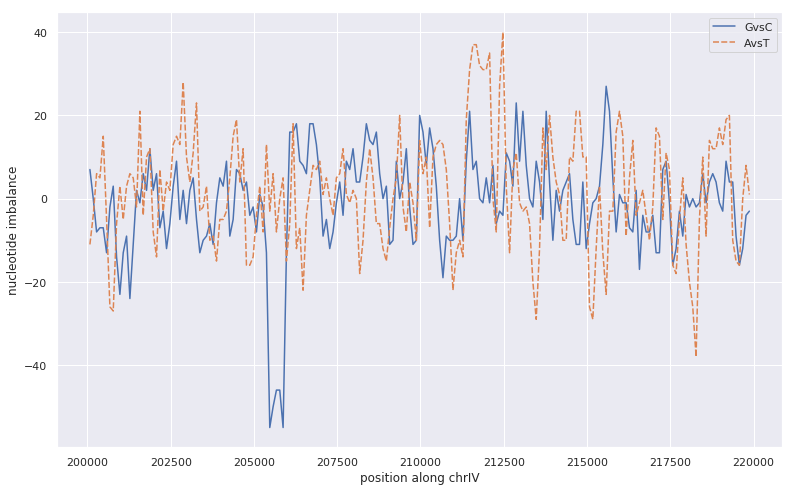

In [43]:
#Use fnmatch to make a list of files ending in `.fsa` and the work through them splicing out useful bits to make plot command
import os
import sys
import fnmatch
name_part_to_match = ".fsa"
associated_fns= []
for file in os.listdir('.'):
    if fnmatch.fnmatch(file, '*'+name_part_to_match):
        associated_fns.append(file)
sys.stderr.write("Files ending in `{}` identified.\nReading and plotting each...".format(name_part_to_match))
# Interate over list to process name and fire off commands
for fn in associated_fns:
    chr_name = fn.split("_")[1]
    start_num = int(fn.split("_")[2].rsplit("-")[0])
    nucleotide_difference_imbalance_plot_stylized_like_Figure_8_of_Morrill_et_al_2016(fn, chr_name, start_num, return_fig=True)
sys.stderr.write("\nEnd of list of files ending in `{}`reached.\nDone.".format(name_part_to_match))


The only difference besides the line calling the function was that we needed to cast `start_num` to integer.

I mentioned earlier that the figure object returned by the command can be modified subsequently. This allows customization of the image using Python. This notebook will end by illustrating that with the addition of a title, adjustment of the font sizes, and addition of annotation.

#### Customizing via Python the returned figure object generated by the script 

Note that running from the command line, we generated an image file that we could modify using image software. (Note: you probably be best to add the `--save_vg` in that case as that will make an infinitely scalabe vector graphics file.) However, by using the main function via import and getting back a plot figure object, it can be further modifed still via Python plot commands.
Let's demonstrate by adding a title, adjusting the font size, and adding an annotation.

In [ ]:
import time

def executeSomething():
    #code here
    print ('.')
    time.sleep(480) #60 seconds times 8 minutes

while True:
    executeSomething()

.
.


Then we'll demonstate doing the second part above.

Then well demonstrate adding title and annotation.

In [19]:
end_of_seq = result.split()[1][-10:]
end_of_seq

'ACCCACCACA'

Note that the `keep_description` flag can also be used; it needs to be set to `True` when calling the main function.

In [20]:
fasta = extract_subsequence_from_FASTA("S288C_YOR270C_VPH1_protein.fsa", "blahBLAHblah",region_str="201-300", keep_description = True, return_record_as_string=True)
fasta

Single sequence with id of 'VPH1' provided in the sequence file.
It will be used as the source of the sequence covering the provided positions.



*****************DONE**************************
Extracted sequence saved in FASTA format as 'seq_extractedVPH1.fa'.
*****************DONE**************************


'>VPH1 YOR270C SGDID:S000005796:201-300\nQILWRVLRGNLFFKTVEIEQPVYDVKTREYKHKNAFIVFSHGDLIIKRIRKIAESLDANLYDVDSSNEGRSQQLAKVNKNLSDLYTVLKTTSTTLESELY'

The next cell shows that result without the flag.

In [21]:
fasta = extract_subsequence_from_FASTA("S288C_YOR270C_VPH1_protein.fsa", "blahBLAHblah",region_str="201-300", return_record_as_string=True)
fasta

Single sequence with id of 'VPH1' provided in the sequence file.
It will be used as the source of the sequence covering the provided positions.



*****************DONE**************************
Extracted sequence saved in FASTA format as 'seq_extractedVPH1.fa'.
*****************DONE**************************


'>VPH1:201-300\nQILWRVLRGNLFFKTVEIEQPVYDVKTREYKHKNAFIVFSHGDLIIKRIRKIAESLDANLYDVDSSNEGRSQQLAKVNKNLSDLYTVLKTTSTTLESELY'

If you wanted to save the object from within the notebook, you can do that too.

In [22]:
%store end_of_seq > end.fa

Writing 'end_of_seq' (str) to file 'end.fa'.


Let's check that:

In [23]:
!head end.fa

ACCCACCACA


Save your file to your local machine.

Enjoy!